In [97]:
import numpy as np


Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.



In [98]:
class Linear_Regression:
    #INITIATING THE PARAMETERS LEARNING RATE AND NUMBER OF ITERATIONS 
    def __init__(self,learning_rate,number_of_iterations):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations

    #Calculate the gradient of the loss function
        

    def fit(self,X,Y):
        #NUMBER OF TRAINING EXAMPLES AND NUMBER OF FEATURES
        #FEATURES = COLUMNS TITLE....

        #INITIALIZING THE WEIGHTS AND BIAS
        self.m,self.n = X.shape #NUMBER OF ROWS AND COLUMNS 

        #ITERATING THE WEIGHT AND BIAS
        self.w = np.zeros(self.n)

        self.b = 0
        self.X = X
        self.Y = Y

        #IMPLEMENTING GRADIENT DESCENT
        for i in range(self.number_of_iterations):
            self.update_weights()


    def update_weights(self):
        Y_prediction = self.predict()

        #CALCULATE THE GRADIENT
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m 
        db = -2 * np.sum(self.Y - Y_prediction) / self.m   

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self):
        return self.X.dot(self.w) + self.b

Work flow of the Linear Regression model:
Step 1: Set Learning Rate & Number of Iterations; Initiate Random weight and bias value.
Step 2: Build Linear Regression Equation. (y = wx + b)
Step 3: Find the "y pred" value for given x value for the corresponding weight & bias.
Step 4; Check the loss function for these parameter values, (difference between "y pred" & "true y"
Step 5: Update the parameter values using Gradient Descent. (new weight & bias value)
Step 6: Step 3, 4, 5 are repeated till we get minimum loss function
Finally we will get the best model (best weight and bias value) as it has minimum loss function.


In [99]:
#IMORTING DEPENDENCIES
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [100]:
salary_data  =pd.read_csv('/Users/athulnambiar/Desktop/PROJECTS/ML-YT/ML3/salary_data.csv')

In [101]:
salary_data.head()
salary_data.info()
salary_data.tail()
salary_data.describe()
salary_data.shape
salary_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


YearsExperience    0
Salary             0
dtype: int64

In [102]:
#SPLITING FEATURE AND TARGET VARIABLE
x = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values


In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=2)

TRAINING THE LINEAR REGRESSION MODEL

In [104]:
model = Linear_Regression(learning_rate=0.02,number_of_iterations=1000)

In [105]:
model.fit(x_train,y_train)

In [106]:
print('bias',model.w,model.b)
print('weights',model.w[0])


bias [9514.40099904] 23697.406507136307
weights 9514.400999035135


y = 9514(x) + 23697
y = salary
x = years of experience

In [107]:
#PREDICTING THE SALARYFOR TEST DATA
test_data_prediction = model.predict()
print(test_data_prediction)


[ 51289.16940434 115035.65609787  61755.01050328  44629.08870501
  60803.57040337  72220.85160222 121695.7367972  109327.01549845
  74123.73180202  37969.00800569  54143.48970405 114084.21599797
 106472.69519874  79832.37240144  61755.01050328  98861.17439951
 123598.61699701  62706.45060318  70317.97140241  54143.48970405]


Text(0, 0.5, 'salary')

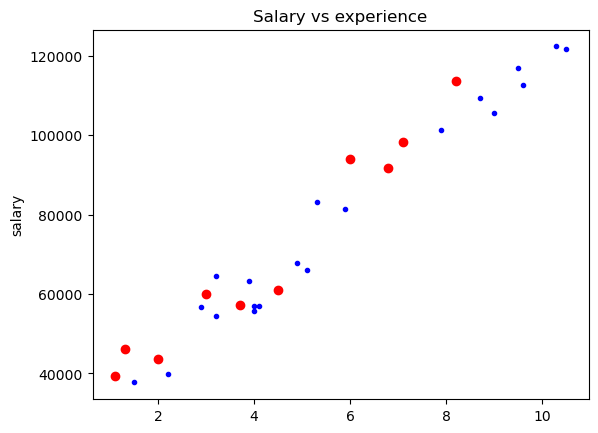

In [113]:
#VISUALIZING THE PREDICTED VALUES AND ACTUAL VALUES
plt.plot(x_train,y_train,'b.')
plt.scatter(x_test,y_test,color='red')
plt.title("Salary vs experience")
plt.ylabel('salary')
